<a href="https://colab.research.google.com/github/soobook/TensorFlow-DL/blob/main/code/TF08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8회차: CNN을 활용한 패션 아이템 분류 (2) – 데이터 처리 및 전처리

## numpy 활용

In [1]:
import numpy as np

ary1 = np.array([1, 2, 3])
ary2 = np.array([[1, 2, 3.], [4, 5, 6]])

print(ary1)
print(ary2)

[1 2 3]
[[1. 2. 3.]
 [4. 5. 6.]]


In [2]:
type(ary1), type(ary2)

(numpy.ndarray, numpy.ndarray)

In [3]:
import numpy as np

ary1 = np.array([1, 2, 3])
ary2 = np.array([[1, 2, 3.], [4, 5, 6]])

print(f'ary1.ndim = {ary1.ndim}, ary1.shape = {ary1.shape}')
print(f'ary1.size = {ary1.size}, ary1.dtype = {ary1.dtype}')
print(f'ary2.ndim = {ary2.ndim}, ary1.shape = {ary2.shape}')
print(f'ary2.size = {ary2.size}, ary1.dtype = {ary2.dtype}')

ary1.ndim = 1, ary1.shape = (3,)
ary1.size = 3, ary1.dtype = int64
ary2.ndim = 2, ary1.shape = (2, 3)
ary2.size = 6, ary1.dtype = float64


In [4]:
import numpy as np

# [0, 1) 사이의 난수
print(np.random.rand())     # 1개
print(np.random.rand(4))    # 1차원 4개
print(np.random.rand(2, 3)) # 2차원, 2행 3열

0.31148058465598105
[0.78590016 0.13949698 0.03656959 0.00441958]
[[0.66489255 0.99251058 0.15167133]
 [0.80171047 0.1063042  0.2839797 ]]


In [5]:
# [0, 1) 사이의 난수
print(np.random.random())            # 1개
print(np.random.random(size=(2, 3))) # 2차원, 2행 3열
print(np.random.random((2, 4)))      # 2차원, 2행 4열

0.5405490220470575
[[0.86789283 0.74341849 0.44947228]
 [0.15715149 0.84107919 0.49876506]]
[[0.8976189  0.46125213 0.87652774 0.27038106]
 [0.89947834 0.22500565 0.34482894 0.46327713]]


In [6]:
# 표준 정규 분포 난수
print(np.random.randn())     # 1개
print(np.random.randn(3))    # 1차원 3개
print(np.random.randn(2, 3)) # 2차원, 2행 3열

0.475032655466962
[-0.09529036  1.29622548  1.23291809]
[[ 1.54147132  0.54542522  1.32331494]
 [ 0.29275107 -0.43012737 -0.44011146]]


In [7]:
# 정규 분포 난수
# 평균 0, 표준편차 1, 정규 분포 난수
print(np.random.normal())             # 1개
print(np.random.normal(0, 1, 3))      # 1차원 3개
# 평균 1, 표준편차 2, 정규 분포 난수
print(np.random.normal(1, 2, (2, 3))) # 2차원, 2행 3열

1.223807491865951
[-0.4551727   0.42485484 -0.18401318]
[[-0.3891729  -1.18942664  1.83900166]
 [-0.57706994  1.0413772   4.20975332]]


## 데이터 전처리와 이미지 시각화

In [8]:
# 필수 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로우 불러오기
import tensorflow as tf

In [9]:
# 1 데이터 로딩 및 전처리
# Fashion MNIST 데이터셋 로딩 (훈련 데이터와 테스트 데이터 분리 제공됨)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
# ndarray 모양 출력
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print()
print(x_train.min(), x_train.max())
print(y_train, y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

0 255
[9 0 0 ... 3 0 5] [9 2 1 ... 8 1 5]


In [12]:
# Fashion-MNIST 클래스(레이블)에 해당하는 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

- 주피터 노트북(Jupyter Notebook) 환경에서 그래프의 해상도(선명도)를 높이기 위한 설정
  -	Jupyter Notebook / IPython 환경 전용 매직 명령어
  - %config는 IPython의 설정을 바꾸는 명령어
  - InlineBackend.figure_format
	  - 노트북 안에서 그리는 그림(그래프)의 렌더링 방식을 지정하는 옵션



In [13]:
# 주피터노트북에서 그림 선명하게
%config InlineBackend.figure_format = 'retina'

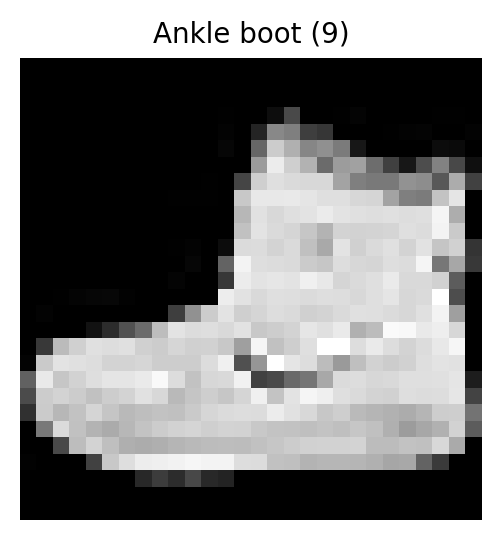

In [14]:
# 첫 데이터 시각화
import matplotlib.pyplot as plt

img, idx = x_train[0], y_train[0] # 이미지와 정답 저장
plt.figure(figsize=(4, 3)) # 그림 크기 설정
plt.imshow(img, cmap='gray')  # 흑백(cmap='gray') 이미지 출력
plt.title(f"{class_names[idx]} ({idx})", fontsize=10)  # 제목: 클래스 이름 + 레이블 번호
plt.axis('off')  # x/y 축 안 보이게 설정
plt.show();

### Min-Max Normalization Formula

Min-Max 정규화는 다음과 같은 수식으로 표현됩니다:

$$
x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

- $x$: 원본 데이터 값  
- $\min(x)$: 해당 피처의 최소값  
- $\max(x)$: 해당 피처의 최대값  
- $x_{\text{norm}}$: 정규화된 값 (0~1)

In [15]:
# 데이터 정규화
# 픽셀 값을 0~255 정수에서 0~1 실수로 정규화 (모델 성능 향상)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
print(x_train.min(), x_train.max())

0.0 1.0


### 합성곱 신경망 CNN이 요구하는 입력 형식에 맞게 데이터를 변경
- 채널 축(channel dimension)을 추가: 흑백이라 채널 수는 1 (컬러면 3)
- 3차원 이미지 (수, 28, 28)을 4차원으로 확장해서 (수, 28, 28, 1)
	- 학습 데이터: (60000, 28, 28) -> (60000, 28, 28, 1)
	- 테스트 데이터: (10000, 28, 28) -> (10000, 28, 28, 1)
  - 텐서 형태가 CNN에서 원하는 4차원 구조 (배치, 높이, 너비, 채널)


In [17]:
# CNN 입력 형식에 맞게 채널 차원 추가: (28, 28) → (28, 28, 1)
x_train = x_train[..., np.newaxis]  # shape: (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]    # shape: (10000, 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### pip(Pip Installs Packages) 명령
- !는 Jupyter/Colab에서 셀 안에서 터미널 명령어를 실행할 수 있게 해주는 접두사
- matplotlib 한글 설정 패키지인 koreanize-matplotlib의 설치 정보를 확인하는 명령어

In [18]:
!pip show koreanize-matplotlib

In [19]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.7 MB/s eta 0:00:00


### Fashion-MNIST에서 10개의 클래스 이미지 시각화(그리기)
- 학습 데이터에서 클래스별로 첫 번째 이미지만 골라서 저장
- class_images: 인덱스 0 ~ 9 에 해당하는 이미지를 저장하는 리스트
- found_classes: 이미 저장한 클래스 번호 추적용 집합



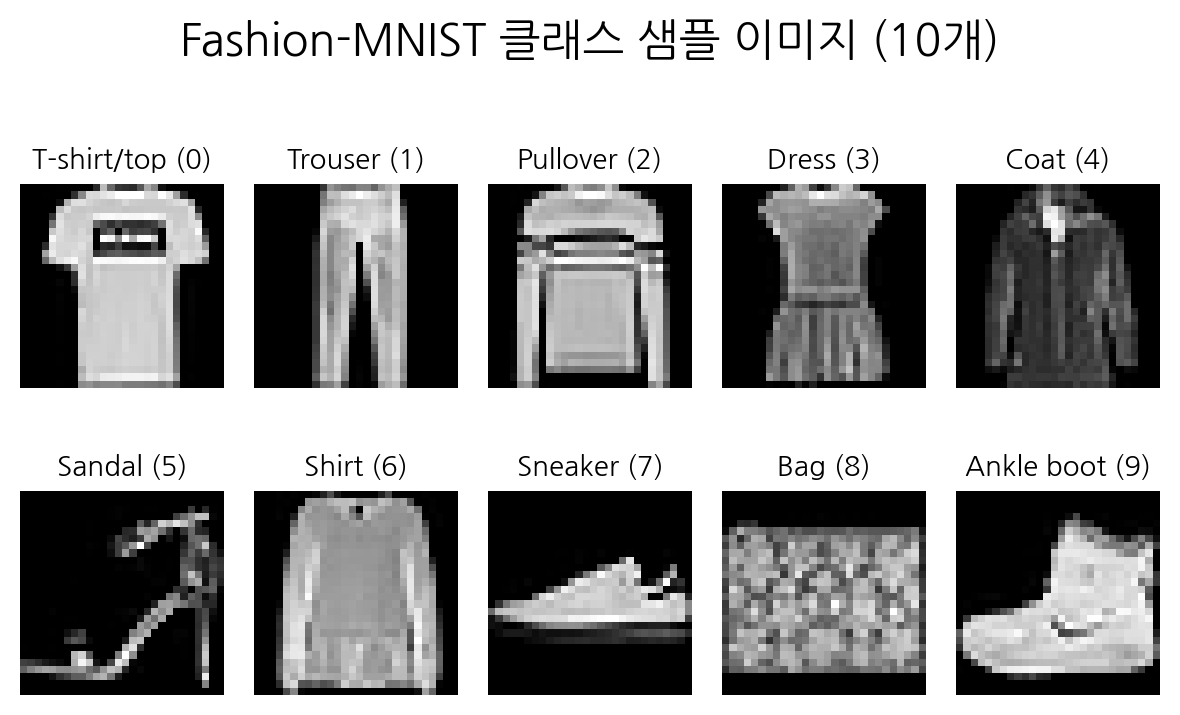

In [20]:
# 필요한 라이브러리 임포트
import tensorflow as tf            # TensorFlow: 딥러닝 프레임워크
import matplotlib.pyplot as plt    # matplotlib: 이미지 시각화 라이브러리

# Fashion-MNIST 데이터셋 로드
# 학습용 이미지와 라벨만 사용 (테스트 데이터는 무시)
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# 각 클래스 번호(0~9)에 대응하는 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 각 클래스별로 첫 번째로 등장하는 이미지를 저장할 리스트 (10개)
class_images = [None] * 10  # 인덱스 0~9에 해당하는 이미지가 들어갈 예정
found_classes = set()       # 이미 저장한 클래스 번호 추적용 집합

# 학습 이미지와 라벨을 한 쌍씩 반복하며 이미지 수집
for img, label in zip(train_images, train_labels):
    # 해당 라벨을 아직 저장하지 않았다면
    if label not in found_classes:
        class_images[label] = img         # 해당 라벨의 이미지를 저장
        found_classes.add(label)          # 라벨 번호를 집합에 추가

    # 모든 10개 클래스의 이미지가 수집되면 반복 종료
    if len(found_classes) == 10:
        break

# 시각화를 위한 그림과 축 객체 생성 (2행 5열)
fig, axes = plt.subplots(2, 5, figsize=(6, 4))  # 전체 크기 설정

# 저장된 10개 이미지를 순서대로 시각화
for idx, image in enumerate(class_images):
    row = idx // 5     # 행 번호: 0 또는 1
    col = idx % 5      # 열 번호: 0~4
    ax = axes[row, col]  # 해당 위치의 subplot 선택

    ax.imshow(image, cmap='gray')  # 흑백(cmap='gray') 이미지 출력
    ax.set_title(f"{class_names[idx]} ({idx})", fontsize=10)  # 제목: 클래스 이름 + 레이블 번호
    ax.axis('off')  # x/y 축 안 보이게 설정

plt.suptitle("Fashion-MNIST 클래스 샘플 이미지 (10개)", fontsize=16)
# 레이아웃 자동 정리 (겹치지 않게)
plt.tight_layout()
plt.show()  # 화면에 그림 출력

### 수업 종료

### 심화학습: 학습 데이터에서 이미지 추출을 시작하는 위치 idx를 지정하는 코드

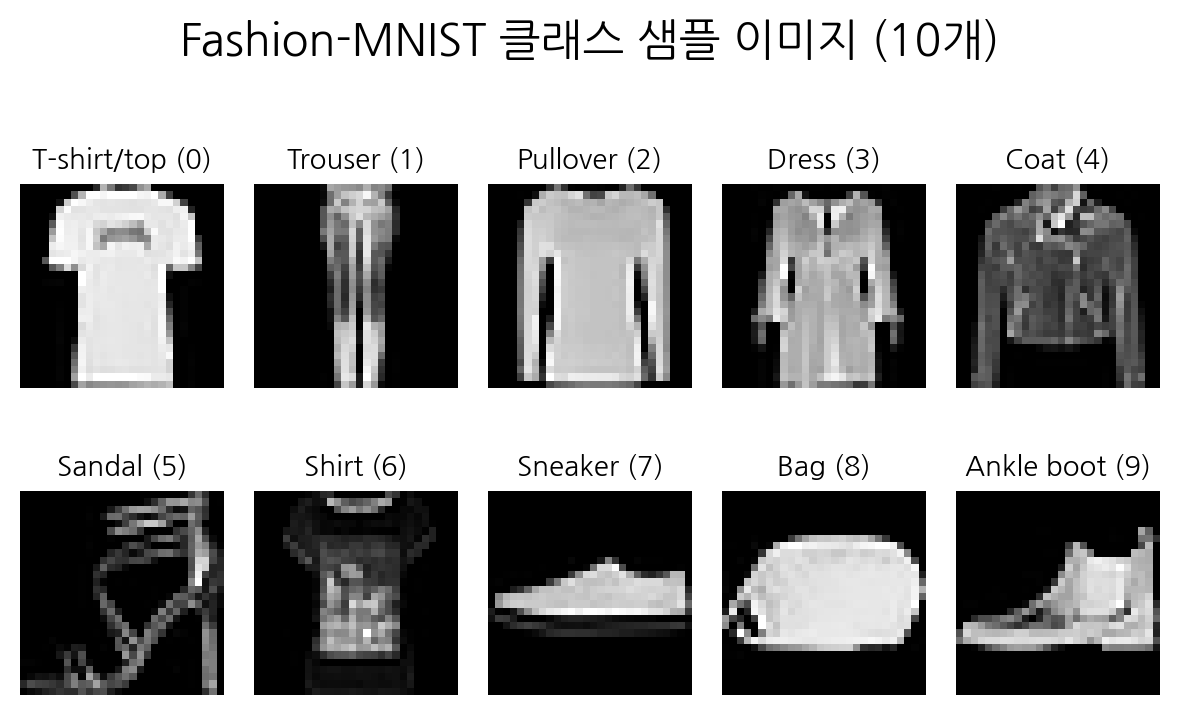

In [34]:
# 필요한 라이브러리 임포트
import tensorflow as tf            # TensorFlow: 딥러닝 프레임워크
import matplotlib.pyplot as plt    # matplotlib: 이미지 시각화 라이브러리
import numpy as np

# Fashion-MNIST 데이터셋 로드
# 학습용 이미지와 라벨만 사용 (테스트 데이터는 무시)
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# 각 클래스 번호(0~9)에 대응하는 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 이미지를 추출하는 시작 인덱스 지정
# idx = 500
idx = np.random.randint(40000) # 정수 [0, 39999] 난수 발생
train_images = train_images[idx:]
train_labels = train_labels[idx:]

# 각 클래스별로 첫 번째로 등장하는 이미지를 저장할 리스트 (10개)
class_images = [None] * 10  # 인덱스 0~9에 해당하는 이미지가 들어갈 예정
found_classes = set()       # 이미 저장한 클래스 번호 추적용 집합

# 학습 이미지와 라벨을 한 쌍씩 반복하며 이미지 수집
for img, label in zip(train_images, train_labels):
    # 해당 라벨을 아직 저장하지 않았다면
    if label not in found_classes:
        class_images[label] = img         # 해당 라벨의 이미지를 저장
        found_classes.add(label)          # 라벨 번호를 집합에 추가

    # 모든 10개 클래스의 이미지가 수집되면 반복 종료
    if len(found_classes) == 10:
        break

# 시각화를 위한 그림과 축 객체 생성 (2행 5열)
fig, axes = plt.subplots(2, 5, figsize=(6, 4))  # 전체 크기 설정

# 저장된 10개 이미지를 순서대로 시각화
for idx, image in enumerate(class_images):
    row = idx // 5     # 행 번호: 0 또는 1
    col = idx % 5      # 열 번호: 0~4
    ax = axes[row, col]  # 해당 위치의 subplot 선택

    ax.imshow(image, cmap='gray')  # 흑백(cmap='gray') 이미지 출력
    ax.set_title(f"{class_names[idx]} ({idx})", fontsize=10)  # 제목: 클래스 이름 + 레이블 번호
    ax.axis('off')  # x/y 축 안 보이게 설정

plt.suptitle("Fashion-MNIST 클래스 샘플 이미지 (10개)", fontsize=16)
# 레이아웃 자동 정리 (겹치지 않게)
plt.tight_layout()
plt.show()  # 화면에 그림 출력

### 종료